In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## matplotlib技巧集

### 使用agg背景在圖形上繪圖

In [13]:
import numpy as np
from matplotlib.backends.backend_agg import RendererAgg

w, h = 250, 250
renderer = RendererAgg(w, h, 90)
buf = renderer.buffer_rgba()
arr = np.frombuffer(buf, np.uint8).reshape(h, w, -1)
print(arr.shape)

(250, 250, 4)


In [14]:
from matplotlib.path import Path
from matplotlib import transforms

path_data = [
    (Path.MOVETO, (179, 1)),
    (Path.CURVE4, (117, 75)),
    (Path.CURVE4, (12, 230)),
    (Path.CURVE4, (118, 230)),
    (Path.LINETO, (142, 187)),
    (Path.CURVE4, (210, 290)),
    (Path.CURVE4, (250, 132)),
    (Path.CURVE4, (200, 105)),
    (Path.CLOSEPOLY, (179, 1)),
]

code, points = zip(*path_data)
path = Path(points, code)

gc = renderer.new_gc()
gc.set_linewidth(2)
gc.set_foreground((1, 0, 0))
gc.set_antialiased(True)
renderer.draw_path(gc, path, transforms.IdentityTransform(), (0, 1, 0))

In [15]:
from matplotlib.patches import Circle
from matplotlib.text import Text

c = Circle((w/2, h/2), 50, edgecolor="blue", facecolor="yellow", linewidth=2, alpha=0.5)
c.draw(renderer)

text = Text(w/2, h/2, "Circle", va="center", ha="center")
text.figure = renderer
text.draw(renderer)

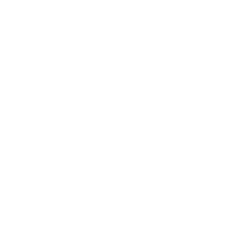

In [16]:
#%fig=直接使用RendererAgg繪圖
from io import BytesIO
from IPython.display import display_png
png_buf = BytesIO()
plt.imsave(png_buf, arr, format="png")
display_png(png_buf.getvalue(), raw=True)

> **SOURCE**

> `scpy2.matplotlib.ImageDrawer`：使用`RendererAgg`直接在圖形上繪圖，方便使用者在圖形上標注訊息。

In [6]:
# #%fig=使用本書提供的ImageDrawer在圖形上繪圖
# from scpy2.matplotlib import ImageDrawer
# img = plt.imread("vinci_target.png")
# drawer = ImageDrawer(img)
# drawer.set_parameters(lw=2, color="white", alpha=0.5)
# drawer.line(8, 60, 280, 60)
# drawer.circle(123, 130, 50, facecolor="yellow", lw=4)
# drawer.markers("x", [82, 182], [218, 218], [50, 100])
# drawer.rectangle(81, 330, 100, 30, facecolor="blue")
# drawer.text(10, 50, u"Mona Lisa", fontsize=40)
# drawer.ellipse(119, 255, 200, 100, 100, facecolor="red")
# %array_image drawer.to_array()

### 響應滑鼠與鍵碟事件

> **TIP**

> 為了在Notebook中執行本節程式碼，需要啟動GUI事件處理執行緒，例如執行`%gui qt`和`%matplotlib qt`，將啟動Qt的GUI執行緒，並將`Qt4Agg`設定為matplotlib的繪圖背景。若果希望切換到內嵌模式，可以再執行`%matplotlib inline`。

In [27]:
%gui qt
%matplotlib qt

#### 鍵碟事件

> **SOURCE**

> `scpy2.matplotlib.key_event_show_key`：顯示觸發鍵碟按鍵事件的按鍵名稱。

In [28]:
#%hide
# %exec_python -m scpy2.matplotlib.key_event_show_key

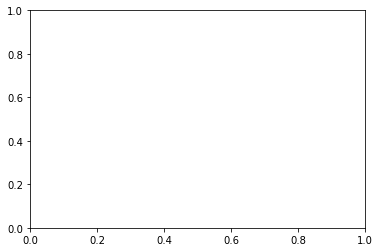

In [31]:
import sys

fig, ax = plt.subplots()

def on_key_press(event):
    print(event.key)
    sys.stdout.flush()
    
fig.canvas.mpl_connect('key_press_event', on_key_press);

In [32]:
for key, funcs in fig.canvas.callbacks.callbacks.items():
    print(key)
    for cid, wrap in sorted(funcs.items()):
        func = wrap.func
        print("    {0}:{1}.{2}".format(cid, func.__module__, func))

button_press_event
    1:matplotlib.backend_bases.<function FigureCanvasBase.pick at 0x7f4caa3be488>
scroll_event
    2:matplotlib.backend_bases.<function FigureCanvasBase.pick at 0x7f4caa3be488>
key_press_event
    3:matplotlib.backend_bases.<function FigureManagerBase.key_press at 0x7f4caa3c0d08>
    5:__main__.<function on_key_press at 0x7f4ca713f9d8>


> **SOURCE**

> `scpy2.matplotlib.key_event_change_color`：透過按鍵修改曲線的彩色。

In [36]:
#%hide
%exec_python -m scpy2.matplotlib.key_event_change_color

ERROR:root:Line magic function `%exec_python` not found.


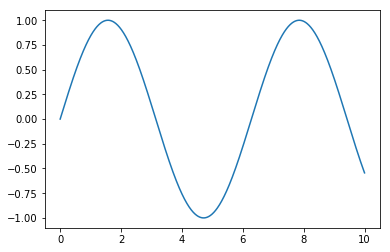

In [37]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 1000)
line, = ax.plot(x, np.sin(x))

def on_key_press(event):
    if event.key in 'rgbcmyk':
        line.set_color(event.key)  #❶
    fig.canvas.draw_idle()         #❷

fig.canvas.mpl_disconnect(fig.canvas.manager.key_press_handler_id)
fig.canvas.mpl_connect('key_press_event', on_key_press);

#### 滑鼠事件

> **SOURCE**

> `scpy2.matplotlib.mouse_event_show_info`：顯示子圖中的滑鼠事件的各種訊息。

In [21]:
#%hide
%exec_python -m scpy2.matplotlib.mouse_event_show_info

ERROR:root:Line magic function `%exec_python` not found.


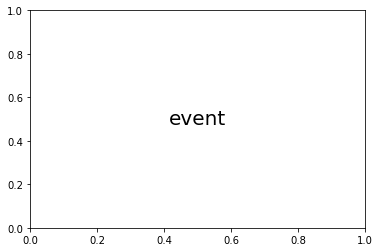

In [38]:
import sys
fig, ax = plt.subplots()
text = ax.text(0.5, 0.5, "event", ha="center", va="center", fontdict={"size":20})

def on_mouse(event):
    global e
    e = event
    info = "{}\nButton:{}\nFig x,y:{}, {}\nData x,y:{:3.2f}, {:3.2f}".format(
    event.name, event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(info)
    fig.canvas.draw()

fig.canvas.mpl_connect('button_press_event', on_mouse)
fig.canvas.mpl_connect('button_release_event', on_mouse)
fig.canvas.mpl_connect('motion_notify_event', on_mouse);

> **SOURCE**

> `scpy2.matplotlib.mouse_event_move_polygon`：示範透過滑鼠搬移`Patch`物件。

In [39]:
#%hide
# %exec_python -m scpy2.matplotlib.mouse_event_move_polygon

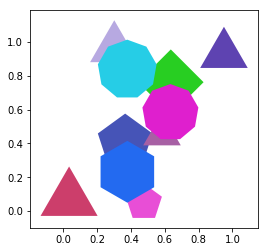

In [40]:
from numpy.random import rand, randint
from matplotlib.patches import RegularPolygon


class PatchMover(object):
    def __init__(self, ax):
        self.ax = ax
        self.selected_patch = None
        self.start_mouse_pos = None
        self.start_patch_pos = None

        fig = ax.figure
        fig.canvas.mpl_connect('button_press_event', self.on_press)
        fig.canvas.mpl_connect('button_release_event', self.on_release)
        fig.canvas.mpl_connect('motion_notify_event', self.on_motion)

    def on_press(self, event): #❶
        patches = self.ax.patches[:]
        patches.sort(key=lambda patch:patch.get_zorder())
        for patch in reversed(patches):
            if patch.contains_point((event.x, event.y)):  #❷
                self.selected_patch = patch
                self.start_mouse_pos = np.array([event.xdata, event.ydata])
                self.start_patch_pos = patch.xy
                break

    def on_motion(self, event):   #❸
        if self.selected_patch is not None:
            pos = np.array([event.xdata, event.ydata])
            self.selected_patch.xy = self.start_patch_pos + pos - self.start_mouse_pos
            self.ax.figure.canvas.draw_idle()   #❹

    def on_release(self, event):   #❺
        self.selected_patch = None

        
fig, ax = plt.subplots()
ax.set_aspect("equal")
for i in range(10):
    poly = RegularPolygon(rand(2), randint(3, 10), rand() * 0.1 + 0.1, facecolor=rand(3),
                          zorder=randint(10, 100))
    ax.add_patch(poly)
ax.relim()
ax.autoscale()
pm = PatchMover(ax)

plt.show()

#### 點選事件

> **SOURCE**

> `scpy2.matplotlib.pick_event_demo`：示範繪圖物件的點選事件。

In [25]:
#%hide
%exec_python -m scpy2.matplotlib.pick_event_demo

ERROR:root:Line magic function `%exec_python` not found.


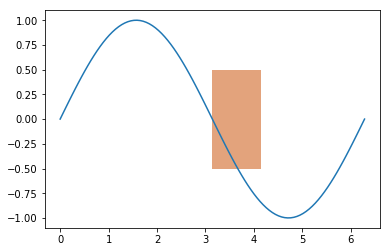

In [26]:
fig, ax = plt.subplots()
rect = plt.Rectangle((np.pi, -0.5), 1, 1, fc=np.random.random(3), picker=True)
ax.add_patch(rect)
x = np.linspace(0, np.pi*2, 100)
y = np.sin(x)
line, = plt.plot(x, y, picker=8.0)

def on_pick(event):
    artist = event.artist
    if isinstance(artist, plt.Line2D):
        lw = artist.get_linewidth()
        artist.set_linewidth(lw % 5 + 1)
    else:
        artist.set_fc(np.random.random(3))
    fig.canvas.draw_idle()
    
fig.canvas.mpl_connect('pick_event', on_pick);

#### 實時反白顯示曲線

> **SOURCE**

> `scpy2.matplotlib.mouse_event_highlight_curve`：滑鼠搬移到曲線之上時反白顯示該曲線。

In [27]:
#%hide
%exec_python -m scpy2.matplotlib.mouse_event_highlight_curve

ERROR:root:Line magic function `%exec_python` not found.


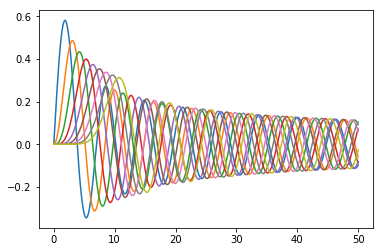

In [28]:
import matplotlib.pyplot as plt
import numpy as np

class CurveHighLighter(object):
    
    def __init__(self, ax, alpha=0.3, linewidth=3):
        self.ax = ax
        self.alpha = alpha
        self.linewidth = 3
        
        ax.figure.canvas.mpl_connect('motion_notify_event', self.on_move) #❶
        
    def highlight(self, target): #❷
        need_redraw = False
        if target is None:
            for line in self.ax.lines:
                line.set_alpha(1.0)
                if line.get_linewidth() != 1.0:
                    line.set_linewidth(1.0)
                    need_redraw = True
        else:
            for line in self.ax.lines:
                lw = self.linewidth if line is target else 1
                if line.get_linewidth() != lw:
                    line.set_linewidth(lw)
                    need_redraw = True
                alpha = 1.0 if lw == self.linewidth else self.alpha
                line.set_alpha(alpha)

        if need_redraw:
            self.ax.figure.canvas.draw_idle()
        
    def on_move(self, evt):
        ax = self.ax
        for line in ax.lines:
            if line.contains(evt)[0]: #❸
                self.highlight(line)
                break
        else:
            self.highlight(None)

fig, ax = plt.subplots()
x = np.linspace(0, 50, 300)

from scipy.special import jn

for i in range(1, 10):
    ax.plot(x, jn(i, x))

ch = CurveHighLighter(ax)

### 動畫

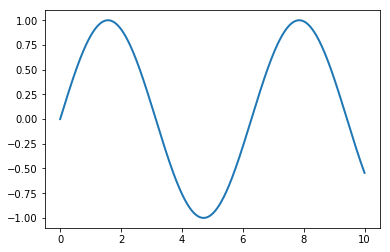

In [41]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(0, 10, 1000)
line, = ax.plot(x, np.sin(x), lw=2)

def update_data(line):
    x[:] += 0.1
    line.set_ydata(np.sin(x)) #❷
    fig.canvas.draw()         #❸

timer = fig.canvas.new_timer(interval=50) #❶
timer.add_callback(update_data, line)
timer.start()

#### 使用快取快速重繪圖表

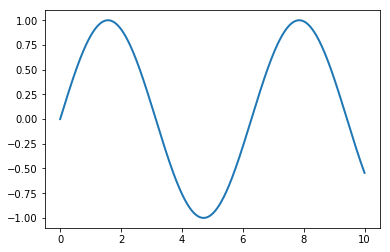

In [30]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 1000)
line, = ax.plot(x, np.sin(x), lw=2, animated=True) #❶

fig.canvas.draw() #❷
background = fig.canvas.copy_from_bbox(ax.bbox) #❸

def update_data(line):
    x[:] += 0.1
    line.set_ydata(np.sin(x)) 
    fig.canvas.restore_region(background)  #❹
    ax.draw_artist(line)     #❺
    fig.canvas.blit(ax.bbox) #❻

timer = fig.canvas.new_timer(interval=50) 
timer.add_callback(update_data, line)
timer.start()

#### animation模組

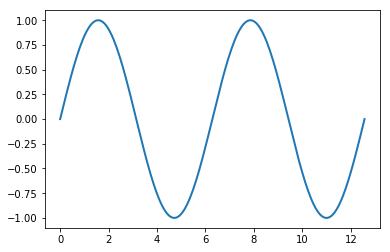

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

x = np.linspace(0, 4*np.pi, 200)
y = np.sin(x)
line, = ax.plot(x, y, lw=2, animated=True) #❶

def update_line(i):
    y = np.sin(x + i*2*np.pi/100)
    line.set_ydata(y)
    return [line] #❷

ani = FuncAnimation(fig, update_line, blit=True, interval=25, frames=100) #❸

> **WARNING**

> matplotlib會使用系統中安裝的視訊壓縮軟體（如`ffmpeg.exe`）產生視訊檔案。請讀者確認視訊壓縮軟體的可執行檔案的路徑是否在`PATH`環境變數中。

In [32]:
ani.save('sin_wave.mp4', fps=25)

/home/wei/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


### 加入GUI面板

> **SOURCE**

> `scpy2.matplotlib.gui_panel`：提供了TK與QT界面庫的滑標控制項面板類別`TkSliderPanel`和`QtSliderPanel`。`tk_panel_demo.py`和`qt_panel_demo.py`為其示範程式。

ERROR:root:Cannot activate multiple GUI eventloops
/home/wei/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


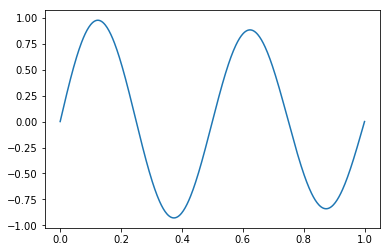

In [34]:
%gui tk
import numpy as np
import matplotlib

matplotlib.use("TkAgg")  #❶

import pylab as pl

def exp_sin(x, A, f, z, p): #❷
    return A * np.sin(2 * np.pi * f * x + p)  * np.exp(z * x)

fig, ax = pl.subplots()

x = np.linspace(1e-6, 1, 500)
pars = {"A":1.0, "f":2, "z":-0.2, "p":0}
y = exp_sin(x, **pars)

line, = pl.plot(x, y)

def update(**kw): #❸
    y = exp_sin(x, **kw)
    line.set_data(x, y) #❹
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle() #❺ 

# from scpy2.matplotlib.gui_panel import TkSliderPanel

# panel = TkSliderPanel(fig,  #❻
#                       [("A", 0, 10), ("f", 0, 10), ("z", -3, 0), ("p", 0, 2*np.pi)],
#                       update, cols=2, min_value_width=80)
# panel.set_parameters(**pars) #❼
# fig.show() #❽

In [35]:
#%hide
%exec_python -m scpy2.matplotlib.tk_panel_demo

ERROR:root:Line magic function `%exec_python` not found.


In [36]:
#%hide
%exec_python -m scpy2.matplotlib.qt_panel_demo

ERROR:root:Line magic function `%exec_python` not found.
